# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

sys.path.append('../src')
from preprocessing import clean_data
from feat_engineering import FeatureEngineering

---
## 2. Load data

In [2]:
df = pd.read_csv('e:/BCGX/data/clean_data_after_eda.csv')

In [ ]:
df = clean_data(df)
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                   0.000131           4.100838e-05   
1                   0.000003           1.217891e-03   
2                   0.000004           9.450150e-08   
3                   0.000003           0.000000e+00   
4                   0.000011           2.896760e-06   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0               9.084737e-04                   2.086294   
1               0.000000e+00                   0.009482   
2               0.000000e+00                   0.000000   
3               0.000000e+00                   0.000000   
4               4.860000e-10                   0.000000   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix var_6m_price_off_peak  \
0              99.530517                  44.235794              2.086425   
1               0.000000                   0.000000              0.009485   
2               0.000000                   0.000000              0.000004   
3               0.000000                   0.000000              0.000003   
4               0.000000                   0.000000              0.000011   

   var_6m_price_peak  var_6m_price_mid_peak  churn  
0       9.953056e+01           4.423670e+01      1  
1       1.217891e-03           0.000000e+00      0  
2       9.450150e-08           0.000000e+00      0  
3       0.000000e+00           0.000000e+00      0  
4       2.896760e-06           4.860000e-10      0  

[5 rows x 44 columns]

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [4]:
df.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [ ]:
price_df0 = pd.read_csv(r'E:\BCGX Data\Data\price_data.csv')
price_df0 = clean_data(price_df0)
price_df = price_df0.copy(deep=True)

price_df0.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [6]:
price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'})

price_off_peak_var  \
id                               price_date                       
0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
                                 2015-02-01            0.126098   
                                 2015-03-01            0.128067   
                                 2015-04-01            0.128067   
                                 2015-05-01            0.128067   
...                                                         ...   
ffff7fa066f1fb305ae285bb03bf325a 2015-08-01            0.119916   
                                 2015-09-01            0.119916   
                                 2015-10-01            0.119916   
                                 2015-11-01            0.119916   
                                 2015-12-01            0.119916   

                                             price_off_peak_fix  
id                               price_date                      
0002203ffbb812588b632b9e628cc38d 2015-01-01           40.565969  
                                 2015-02-01           40.565969  
                                 2015-03-01           40.728885  
                                 2015-04-01           40.728885  
                                 2015-05-01           40.728885  
...                                                         ...  
ffff7fa066f1fb305ae285bb03bf325a 2015-08-01           40.728885  
                                 2015-09-01           40.728885  
                                 2015-10-01           40.728885  
                                 2015-11-01           40.728885  
                                 2015-12-01           40.728885  

[193002 rows x 2 columns]

In [7]:
# # Group off-peak prices by companies and month
# monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg(
#     {'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}
#     ).reset_index()

# # Get january and december prices
# jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
# dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# # Calculate the difference
# diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
# diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
# diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
# diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
# diff.head()

Now it is time to get creative and to conduct some of your own feature engineering! Have fun with it, explore different ideas and try to create as many as you can!

In [8]:
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean',
    'price_off_peak_fix': 'mean'
}).reset_index()

jan_prices = monthly_price_by_id.groupby('id').first()
dec_prices = monthly_price_by_id.groupby('id').last()


diff = dec_prices.drop('price_date', axis = 1).join(jan_prices.drop('price_date', axis = 1), on = 'id', how = 'inner', lsuffix = '_d', rsuffix = '_j')
diff.head()

price_off_peak_var_d  price_off_peak_fix_d  \
id                                                                             
0002203ffbb812588b632b9e628cc38d              0.119906             40.728885   
0004351ebdd665e6ee664792efc4fd13              0.143943             44.444710   
0010bcc39e42b3c2131ed2ce55246e3c              0.201280             45.944710   
0010ee3855fdea87602a5b7aba8e42de              0.113068             40.728885   
00114d74e963e47177db89bc70108537              0.145440             44.266930   

                                  price_off_peak_var_j  price_off_peak_fix_j  
id                                                                            
0002203ffbb812588b632b9e628cc38d              0.126098             40.565969  
0004351ebdd665e6ee664792efc4fd13              0.148047             44.266931  
0010bcc39e42b3c2131ed2ce55246e3c              0.150837             44.444710  
0010ee3855fdea87602a5b7aba8e42de              0.123086             40.565969  
00114d74e963e47177db89bc70108537              0.149434             44.266931

In [9]:
diff['offpeak_diff_dec_january_energy'] = diff['price_off_peak_var_d'] - diff['price_off_peak_var_j']
diff['offpeak_diff_dec_january_power'] = diff['price_off_peak_fix_d'] - diff['price_off_peak_fix_j']

# diff = diff[['id', 'offpeak_diff_dec_january_energy', 'offpeak_diff_dec_january_power']]
diff.loc[:, ['offpeak_diff_dec_january_energy', 'offpeak_diff_dec_january_power']].head()

offpeak_diff_dec_january_energy  \
id                                                                  
0002203ffbb812588b632b9e628cc38d                        -0.006192   
0004351ebdd665e6ee664792efc4fd13                        -0.004104   
0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
00114d74e963e47177db89bc70108537                        -0.003994   

                                  offpeak_diff_dec_january_power  
id                                                                
0002203ffbb812588b632b9e628cc38d                        0.162916  
0004351ebdd665e6ee664792efc4fd13                        0.177779  
0010bcc39e42b3c2131ed2ce55246e3c                        1.500000  
0010ee3855fdea87602a5b7aba8e42de                        0.162916  
00114d74e963e47177db89bc70108537                       -0.000001

### Extract date into other components:

 to extract `month`, `day of month`, `day of year` and `year` into individual columns

In [10]:
# price_df['month'] = price_df['price_date'].dt.month
# price_df['day_of_week'] = price_df['price_date'].dt.dayofweek
# price_df['year'] = price_df['price_date'].dt.year
# price_df['day_of_year'] = price_df['price_date'].dt.dayofyear


## Calculate Price Ratios

In [11]:
diff['offpeak_ratio_dec_january_energy'] = (diff['offpeak_diff_dec_january_energy'] + 1) / diff['offpeak_diff_dec_january_energy']
diff['offpeak_ratio_dec_january_power'] = (diff['offpeak_diff_dec_january_power'] + 1) / diff['offpeak_diff_dec_january_power']

features = diff.loc[:, ['offpeak_diff_dec_january_energy', 'offpeak_diff_dec_january_power', 'offpeak_ratio_dec_january_energy', 'offpeak_ratio_dec_january_power']]
features

offpeak_diff_dec_january_energy  \
id                                                                  
0002203ffbb812588b632b9e628cc38d                        -0.006192   
0004351ebdd665e6ee664792efc4fd13                        -0.004104   
0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
00114d74e963e47177db89bc70108537                        -0.003994   
...                                                           ...   
ffef185810e44254c3a4c6395e6b4d8a                        -0.050232   
fffac626da707b1b5ab11e8431a4d0a2                        -0.003778   
fffc0cacd305dd51f316424bbb08d1bd                        -0.001760   
fffe4f5646aa39c7f97f95ae2679ce64                        -0.009391   
ffff7fa066f1fb305ae285bb03bf325a                        -0.009528   

                                  offpeak_diff_dec_january_power  \
id                                                                 
0002203ffbb812588b632b9e628cc38d                        0.162916   
0004351ebdd665e6ee664792efc4fd13                        0.177779   
0010bcc39e42b3c2131ed2ce55246e3c                        1.500000   
0010ee3855fdea87602a5b7aba8e42de                        0.162916   
00114d74e963e47177db89bc70108537                       -0.000001   
...                                                          ...   
ffef185810e44254c3a4c6395e6b4d8a                       -0.335085   
fffac626da707b1b5ab11e8431a4d0a2                        0.177779   
fffc0cacd305dd51f316424bbb08d1bd                        0.164916   
fffe4f5646aa39c7f97f95ae2679ce64                        0.162916   
ffff7fa066f1fb305ae285bb03bf325a                        0.162916   

                                  offpeak_ratio_dec_january_energy  \
id                                                                   
0002203ffbb812588b632b9e628cc38d                       -160.498708   
0004351ebdd665e6ee664792efc4fd13                       -242.664717   
0010bcc39e42b3c2131ed2ce55246e3c                         20.824356   
0010ee3855fdea87602a5b7aba8e42de                        -98.820323   
00114d74e963e47177db89bc70108537                       -249.375563   
...                                                            ...   
ffef185810e44254c3a4c6395e6b4d8a                        -18.907629   
fffac626da707b1b5ab11e8431a4d0a2                       -263.690312   
fffc0cacd305dd51f316424bbb08d1bd                       -567.181818   
fffe4f5646aa39c7f97f95ae2679ce64                       -105.484932   
ffff7fa066f1fb305ae285bb03bf325a                       -103.953820   

                                  offpeak_ratio_dec_january_power  
id                                                                 
0002203ffbb812588b632b9e628cc38d                         7.138148  
0004351ebdd665e6ee664792efc4fd13                         6.624968  
0010bcc39e42b3c2131ed2ce55246e3c                         1.666667  
0010ee3855fdea87602a5b7aba8e42de                         7.138148  
00114d74e963e47177db89bc70108537                   -833332.333464  
...                                                           ...  
ffef185810e44254c3a4c6395e6b4d8a                        -1.984318  
fffac626da707b1b5ab11e8431a4d0a2                         6.624968  
fffc0cacd305dd51f316424bbb08d1bd                         7.063711  
fffe4f5646aa39c7f97f95ae2679ce64                         7.138148  
ffff7fa066f1fb305ae285bb03bf325a                         7.138148  

[16096 rows x 4 columns]

### Calculate Annual Averages
---

In [12]:
annual_avg = price_df.groupby('id').agg({
    'price_off_peak_var': 'mean',
    'price_off_peak_fix': 'mean'
})

annual_avg.rename(columns={
    'price_off_peak_var': 'avg_price_off_peak_var',
    'price_off_peak_fix': 'avg_price_off_peak_fix'
}, inplace=True)

features = features.join(annual_avg, on = 'id', how = 'left' )
print(features.shape)
features

(16096, 6)


offpeak_diff_dec_january_energy  \
id                                                                  
0002203ffbb812588b632b9e628cc38d                        -0.006192   
0004351ebdd665e6ee664792efc4fd13                        -0.004104   
0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
00114d74e963e47177db89bc70108537                        -0.003994   
...                                                           ...   
ffef185810e44254c3a4c6395e6b4d8a                        -0.050232   
fffac626da707b1b5ab11e8431a4d0a2                        -0.003778   
fffc0cacd305dd51f316424bbb08d1bd                        -0.001760   
fffe4f5646aa39c7f97f95ae2679ce64                        -0.009391   
ffff7fa066f1fb305ae285bb03bf325a                        -0.009528   

                                  offpeak_diff_dec_january_power  \
id                                                                 
0002203ffbb812588b632b9e628cc38d                        0.162916   
0004351ebdd665e6ee664792efc4fd13                        0.177779   
0010bcc39e42b3c2131ed2ce55246e3c                        1.500000   
0010ee3855fdea87602a5b7aba8e42de                        0.162916   
00114d74e963e47177db89bc70108537                       -0.000001   
...                                                          ...   
ffef185810e44254c3a4c6395e6b4d8a                       -0.335085   
fffac626da707b1b5ab11e8431a4d0a2                        0.177779   
fffc0cacd305dd51f316424bbb08d1bd                        0.164916   
fffe4f5646aa39c7f97f95ae2679ce64                        0.162916   
ffff7fa066f1fb305ae285bb03bf325a                        0.162916   

                                  offpeak_ratio_dec_january_energy  \
id                                                                   
0002203ffbb812588b632b9e628cc38d                       -160.498708   
0004351ebdd665e6ee664792efc4fd13                       -242.664717   
0010bcc39e42b3c2131ed2ce55246e3c                         20.824356   
0010ee3855fdea87602a5b7aba8e42de                        -98.820323   
00114d74e963e47177db89bc70108537                       -249.375563   
...                                                            ...   
ffef185810e44254c3a4c6395e6b4d8a                        -18.907629   
fffac626da707b1b5ab11e8431a4d0a2                       -263.690312   
fffc0cacd305dd51f316424bbb08d1bd                       -567.181818   
fffe4f5646aa39c7f97f95ae2679ce64                       -105.484932   
ffff7fa066f1fb305ae285bb03bf325a                       -103.953820   

                                  offpeak_ratio_dec_january_power  \
id                                                                  
0002203ffbb812588b632b9e628cc38d                         7.138148   
0004351ebdd665e6ee664792efc4fd13                         6.624968   
0010bcc39e42b3c2131ed2ce55246e3c                         1.666667   
0010ee3855fdea87602a5b7aba8e42de                         7.138148   
00114d74e963e47177db89bc70108537                   -833332.333464   
...                                                           ...   
ffef185810e44254c3a4c6395e6b4d8a                        -1.984318   
fffac626da707b1b5ab11e8431a4d0a2                         6.624968   
fffc0cacd305dd51f316424bbb08d1bd                         7.063711   
fffe4f5646aa39c7f97f95ae2679ce64                         7.138148   
ffff7fa066f1fb305ae285bb03bf325a                         7.138148   

                                  avg_price_off_peak_var  \
id                                                         
0002203ffbb812588b632b9e628cc38d                0.124338   
0004351ebdd665e6ee664792efc4fd13                0.146426   
0010bcc39e42b3c2131ed2ce55246e3c                0.181558   
0010ee3855fdea87602a5b7aba8e42de                0.118757   
00114d74e963e47177db89bc70108537                0.147926   
...                   

### Calculate Seasonal Prices
---

In [13]:
summer_prices = price_df[(price_df['price_date'].dt.month == 7) | (price_df['price_date'].dt.month == 8)]
winter_prices = price_df[(price_df['price_date'].dt.month == 12) | (price_df['price_date'].dt.month == 1)]

summer_prices.shape, winter_prices.shape

summer_avg = summer_prices.groupby('id').agg({
    'price_off_peak_var': 'mean',
    'price_off_peak_fix': 'mean'
})

winter_avg = winter_prices.groupby('id').agg({
    'price_off_peak_var': 'mean',
    'price_off_peak_fix': 'mean'
})

summer_avg.rename({
    'price_off_peak_var': 'price_off_peak_var_summer',
    'price_off_peak_fix': 'price_off_peak_fix_summer'
}, axis=1, inplace = True)

winter_avg.rename({
    'price_off_peak_var': 'price_off_peak_var_winter',
    'price_off_peak_fix': 'price_off_peak_fix_winter'
}, axis=1, inplace = True)


print(summer_avg.shape, winter_avg.shape)


(16094, 2) (16096, 2)


In [14]:
seasonal_diff = summer_avg.join(winter_avg, on='id', how = 'right', lsuffix = '_summer', rsuffix = '_winter')

seasonal_diff['summer_winter_diff_energy'] = seasonal_diff['price_off_peak_var_summer'] - seasonal_diff['price_off_peak_var_winter']
seasonal_diff['summer_winter_diff_power'] = seasonal_diff['price_off_peak_fix_summer'] - seasonal_diff['price_off_peak_fix_winter']

features = features.join(seasonal_diff[['summer_winter_diff_energy', 'summer_winter_diff_power']], on = 'id', how = 'left')
print(features.shape)
features

(16096, 8)


offpeak_diff_dec_january_energy  \
id                                                                  
0002203ffbb812588b632b9e628cc38d                        -0.006192   
0004351ebdd665e6ee664792efc4fd13                        -0.004104   
0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
00114d74e963e47177db89bc70108537                        -0.003994   
...                                                           ...   
ffef185810e44254c3a4c6395e6b4d8a                        -0.050232   
fffac626da707b1b5ab11e8431a4d0a2                        -0.003778   
fffc0cacd305dd51f316424bbb08d1bd                        -0.001760   
fffe4f5646aa39c7f97f95ae2679ce64                        -0.009391   
ffff7fa066f1fb305ae285bb03bf325a                        -0.009528   

                                  offpeak_diff_dec_january_power  \
id                                                                 
0002203ffbb812588b632b9e628cc38d                        0.162916   
0004351ebdd665e6ee664792efc4fd13                        0.177779   
0010bcc39e42b3c2131ed2ce55246e3c                        1.500000   
0010ee3855fdea87602a5b7aba8e42de                        0.162916   
00114d74e963e47177db89bc70108537                       -0.000001   
...                                                          ...   
ffef185810e44254c3a4c6395e6b4d8a                       -0.335085   
fffac626da707b1b5ab11e8431a4d0a2                        0.177779   
fffc0cacd305dd51f316424bbb08d1bd                        0.164916   
fffe4f5646aa39c7f97f95ae2679ce64                        0.162916   
ffff7fa066f1fb305ae285bb03bf325a                        0.162916   

                                  offpeak_ratio_dec_january_energy  \
id                                                                   
0002203ffbb812588b632b9e628cc38d                       -160.498708   
0004351ebdd665e6ee664792efc4fd13                       -242.664717   
0010bcc39e42b3c2131ed2ce55246e3c                         20.824356   
0010ee3855fdea87602a5b7aba8e42de                        -98.820323   
00114d74e963e47177db89bc70108537                       -249.375563   
...                                                            ...   
ffef185810e44254c3a4c6395e6b4d8a                        -18.907629   
fffac626da707b1b5ab11e8431a4d0a2                       -263.690312   
fffc0cacd305dd51f316424bbb08d1bd                       -567.181818   
fffe4f5646aa39c7f97f95ae2679ce64                       -105.484932   
ffff7fa066f1fb305ae285bb03bf325a                       -103.953820   

                                  offpeak_ratio_dec_january_power  \
id                                                                  
0002203ffbb812588b632b9e628cc38d                         7.138148   
0004351ebdd665e6ee664792efc4fd13                         6.624968   
0010bcc39e42b3c2131ed2ce55246e3c                         1.666667   
0010ee3855fdea87602a5b7aba8e42de                         7.138148   
00114d74e963e47177db89bc70108537                   -833332.333464   
...                                                           ...   
ffef185810e44254c3a4c6395e6b4d8a                        -1.984318   
fffac626da707b1b5ab11e8431a4d0a2                         6.624968   
fffc0cacd305dd51f316424bbb08d1bd                         7.063711   
fffe4f5646aa39c7f97f95ae2679ce64                         7.138148   
ffff7fa066f1fb305ae285bb03bf325a                         7.138148   

                                  avg_price_off_peak_var  \
id                                                         
0002203ffbb812588b632b9e628cc38d                0.124338   
0004351ebdd665e6ee664792efc4fd13                0.146426   
0010bcc39e42b3c2131ed2ce55246e3c                0.181558   
0010ee3855fdea87602a5b7aba8e42de                0.118757   
00114d74e963e47177db89bc70108537                0.147926   
...                   

### Calculate Rolling Averages
---

In [15]:
price_df['price_off_peak_var_rolling'] = price_df.groupby('id')['price_off_peak_var'].rolling(window=3, min_periods=1).mean().reset_index(0, drop=True)
price_df['price_off_peak_fix_rolling'] = price_df.groupby('id')['price_off_peak_fix'].rolling(window=3, min_periods=1).mean().reset_index(0, drop=True)

rolling_avg = price_df.groupby('id').agg({
    'price_off_peak_var_rolling': 'last',
    'price_off_peak_fix_rolling': 'last'
})

rolling_avg.rename(columns={
    'price_off_peak_var_rolling': 'rolling_3m_avg_price_off_peak_var',
    'price_off_peak_fix_rolling': 'rolling_3m_avg_price_off_peak_fix'
}, inplace=True)

features = features.join(rolling_avg, on = 'id', how = 'left')
print(features.shape)
features

(16096, 10)


offpeak_diff_dec_january_energy  \
id                                                                  
0002203ffbb812588b632b9e628cc38d                        -0.006192   
0004351ebdd665e6ee664792efc4fd13                        -0.004104   
0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
00114d74e963e47177db89bc70108537                        -0.003994   
...                                                           ...   
ffef185810e44254c3a4c6395e6b4d8a                        -0.050232   
fffac626da707b1b5ab11e8431a4d0a2                        -0.003778   
fffc0cacd305dd51f316424bbb08d1bd                        -0.001760   
fffe4f5646aa39c7f97f95ae2679ce64                        -0.009391   
ffff7fa066f1fb305ae285bb03bf325a                        -0.009528   

                                  offpeak_diff_dec_january_power  \
id                                                                 
0002203ffbb812588b632b9e628cc38d                        0.162916   
0004351ebdd665e6ee664792efc4fd13                        0.177779   
0010bcc39e42b3c2131ed2ce55246e3c                        1.500000   
0010ee3855fdea87602a5b7aba8e42de                        0.162916   
00114d74e963e47177db89bc70108537                       -0.000001   
...                                                          ...   
ffef185810e44254c3a4c6395e6b4d8a                       -0.335085   
fffac626da707b1b5ab11e8431a4d0a2                        0.177779   
fffc0cacd305dd51f316424bbb08d1bd                        0.164916   
fffe4f5646aa39c7f97f95ae2679ce64                        0.162916   
ffff7fa066f1fb305ae285bb03bf325a                        0.162916   

                                  offpeak_ratio_dec_january_energy  \
id                                                                   
0002203ffbb812588b632b9e628cc38d                       -160.498708   
0004351ebdd665e6ee664792efc4fd13                       -242.664717   
0010bcc39e42b3c2131ed2ce55246e3c                         20.824356   
0010ee3855fdea87602a5b7aba8e42de                        -98.820323   
00114d74e963e47177db89bc70108537                       -249.375563   
...                                                            ...   
ffef185810e44254c3a4c6395e6b4d8a                        -18.907629   
fffac626da707b1b5ab11e8431a4d0a2                       -263.690312   
fffc0cacd305dd51f316424bbb08d1bd                       -567.181818   
fffe4f5646aa39c7f97f95ae2679ce64                       -105.484932   
ffff7fa066f1fb305ae285bb03bf325a                       -103.953820   

                                  offpeak_ratio_dec_january_power  \
id                                                                  
0002203ffbb812588b632b9e628cc38d                         7.138148   
0004351ebdd665e6ee664792efc4fd13                         6.624968   
0010bcc39e42b3c2131ed2ce55246e3c                         1.666667   
0010ee3855fdea87602a5b7aba8e42de                         7.138148   
00114d74e963e47177db89bc70108537                   -833332.333464   
...                                                           ...   
ffef185810e44254c3a4c6395e6b4d8a                        -1.984318   
fffac626da707b1b5ab11e8431a4d0a2                         6.624968   
fffc0cacd305dd51f316424bbb08d1bd                         7.063711   
fffe4f5646aa39c7f97f95ae2679ce64                         7.138148   
ffff7fa066f1fb305ae285bb03bf325a                         7.138148   

                                  avg_price_off_peak_var  \
id                                                         
0002203ffbb812588b632b9e628cc38d                0.124338   
0004351ebdd665e6ee664792efc4fd13                0.146426   
0010bcc39e42b3c2131ed2ce55246e3c                0.181558   
0010ee3855fdea87602a5b7aba8e42de                0.118757   
00114d74e963e47177db89bc70108537                0.147926   
...                   

### Calculate Variability
---

In [16]:
price_variability = price_df.groupby('id').agg({
    'price_off_peak_var': ['std', 'max', 'min'],
    'price_off_peak_fix': ['std', 'max', 'min']
})

price_variability.columns = ['std_price_off_peak_var', 'max_price_off_peak_var', 'min_price_off_peak_var',
                                'std_price_off_peak_fix', 'max_price_off_peak_fix', 'min_price_off_peak_fix']

features = features.join(price_variability, on = 'id', how = 'left')
features

offpeak_diff_dec_january_energy  \
id                                                                  
0002203ffbb812588b632b9e628cc38d                        -0.006192   
0004351ebdd665e6ee664792efc4fd13                        -0.004104   
0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
00114d74e963e47177db89bc70108537                        -0.003994   
...                                                           ...   
ffef185810e44254c3a4c6395e6b4d8a                        -0.050232   
fffac626da707b1b5ab11e8431a4d0a2                        -0.003778   
fffc0cacd305dd51f316424bbb08d1bd                        -0.001760   
fffe4f5646aa39c7f97f95ae2679ce64                        -0.009391   
ffff7fa066f1fb305ae285bb03bf325a                        -0.009528   

                                  offpeak_diff_dec_january_power  \
id                                                                 
0002203ffbb812588b632b9e628cc38d                        0.162916   
0004351ebdd665e6ee664792efc4fd13                        0.177779   
0010bcc39e42b3c2131ed2ce55246e3c                        1.500000   
0010ee3855fdea87602a5b7aba8e42de                        0.162916   
00114d74e963e47177db89bc70108537                       -0.000001   
...                                                          ...   
ffef185810e44254c3a4c6395e6b4d8a                       -0.335085   
fffac626da707b1b5ab11e8431a4d0a2                        0.177779   
fffc0cacd305dd51f316424bbb08d1bd                        0.164916   
fffe4f5646aa39c7f97f95ae2679ce64                        0.162916   
ffff7fa066f1fb305ae285bb03bf325a                        0.162916   

                                  offpeak_ratio_dec_january_energy  \
id                                                                   
0002203ffbb812588b632b9e628cc38d                       -160.498708   
0004351ebdd665e6ee664792efc4fd13                       -242.664717   
0010bcc39e42b3c2131ed2ce55246e3c                         20.824356   
0010ee3855fdea87602a5b7aba8e42de                        -98.820323   
00114d74e963e47177db89bc70108537                       -249.375563   
...                                                            ...   
ffef185810e44254c3a4c6395e6b4d8a                        -18.907629   
fffac626da707b1b5ab11e8431a4d0a2                       -263.690312   
fffc0cacd305dd51f316424bbb08d1bd                       -567.181818   
fffe4f5646aa39c7f97f95ae2679ce64                       -105.484932   
ffff7fa066f1fb305ae285bb03bf325a                       -103.953820   

                                  offpeak_ratio_dec_january_power  \
id                                                                  
0002203ffbb812588b632b9e628cc38d                         7.138148   
0004351ebdd665e6ee664792efc4fd13                         6.624968   
0010bcc39e42b3c2131ed2ce55246e3c                         1.666667   
0010ee3855fdea87602a5b7aba8e42de                         7.138148   
00114d74e963e47177db89bc70108537                   -833332.333464   
...                                                           ...   
ffef185810e44254c3a4c6395e6b4d8a                        -1.984318   
fffac626da707b1b5ab11e8431a4d0a2                         6.624968   
fffc0cacd305dd51f316424bbb08d1bd                         7.063711   
fffe4f5646aa39c7f97f95ae2679ce64                         7.138148   
ffff7fa066f1fb305ae285bb03bf325a                         7.138148   

                                  avg_price_off_peak_var  \
id                                                         
0002203ffbb812588b632b9e628cc38d                0.124338   
0004351ebdd665e6ee664792efc4fd13                0.146426   
0010bcc39e42b3c2131ed2ce55246e3c                0.181558   
0010ee3855fdea87602a5b7aba8e42de                0.118757   
00114d74e963e47177db89bc70108537                0.147926   
...                   

### _**Merge All Features**_

In [17]:
# price_df.set_index('id', inplace = True)
price_df = price_df.join(features, on = 'id', how = 'left')
price_df

id price_date  price_off_peak_var  \
0       038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1       038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2       038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3       038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4       038af19179925da21a25619c5a24b745 2015-05-01            0.149626   
...                                  ...        ...                 ...   
192997  16f51cdc2baa19af0b940ee1b3dd17d5 2015-08-01            0.119916   
192998  16f51cdc2baa19af0b940ee1b3dd17d5 2015-09-01            0.119916   
192999  16f51cdc2baa19af0b940ee1b3dd17d5 2015-10-01            0.119916   
193000  16f51cdc2baa19af0b940ee1b3dd17d5 2015-11-01            0.119916   
193001  16f51cdc2baa19af0b940ee1b3dd17d5 2015-12-01            0.119916   

        price_peak_var  price_mid_peak_var  price_off_peak_fix  \
0             0.000000            0.000000           44.266931   
1             0.000000            0.000000           44.266931   
2             0.000000            0.000000           44.266931   
3             0.000000            0.000000           44.266931   
4             0.000000            0.000000           44.266931   
...                ...                 ...                 ...   
192997        0.102232            0.076257           40.728885   
192998        0.102232            0.076257           40.728885   
192999        0.102232            0.076257           40.728885   
193000        0.102232            0.076257           40.728885   
193001        0.102232            0.076257           40.728885   

        price_peak_fix  price_mid_peak_fix  price_off_peak_var_rolling  \
0              0.00000            0.000000                    0.151367   
1              0.00000            0.000000                    0.151367   
2              0.00000            0.000000                    0.151367   
3              0.00000            0.000000                    0.150787   
4              0.00000            0.000000                    0.150206   
...                ...                 ...                         ...   
192997        24.43733           16.291555                    0.125812   
192998        24.43733           16.291555                    0.122636   
192999        24.43733           16.291555                    0.119916   
193000        24.43733           16.291555                    0.119916   
193001        24.43733           16.291555                    0.119916   

        price_off_peak_fix_rolling  ...  summer_winter_diff_energy  \
0                        44.266931  ...                  -0.000523   
1                        44.266931  ...                  -0.000523   
2                        44.266931  ...                  -0.000523   
3                        44.266931  ...                  -0.000523   
4                        44.266931  ...                  -0.000523   
...                            ...  ...                        ...   
192997                   40.674581  ...                  -0.000684   
192998                   40.728885  ...                  -0.000684   
192999                   40.728885  ...                  -0.000684   
193000                   40.728885  ...                  -0.000684   
193001                   40.728885  ...                  -0.000684   

        summer_winter_diff_power  rolling_3m_avg_price_off_peak_var  \
0                       0.088889                           0.145859   
1                       0.088889                           0.145859   
2                       0.088889                           0.145859   
3                       0.088889                           0.145859   
4                       0.088889                           0.145859   
...                          ...                                ...   
192997                  0.081458                           0.119916   
192998                  0.081458              

In [18]:
for feature in price_df.columns:
    print(feature, '>>>', price_df[feature].nunique())

id >>> 16096
price_date >>> 12
price_off_peak_var >>> 1853
price_peak_var >>> 1189
price_mid_peak_var >>> 711
price_off_peak_fix >>> 66
price_peak_fix >>> 31
price_mid_peak_fix >>> 28
price_off_peak_var_rolling >>> 11179
price_off_peak_fix_rolling >>> 490
offpeak_diff_dec_january_energy >>> 2260
offpeak_diff_dec_january_power >>> 130
offpeak_ratio_dec_january_energy >>> 2260
offpeak_ratio_dec_january_power >>> 130
avg_price_off_peak_var >>> 5258
avg_price_off_peak_fix >>> 922
summer_winter_diff_energy >>> 2834
summer_winter_diff_power >>> 203
rolling_3m_avg_price_off_peak_var >>> 1724
rolling_3m_avg_price_off_peak_fix >>> 159
std_price_off_peak_var >>> 5272
max_price_off_peak_var >>> 590
min_price_off_peak_var >>> 784
std_price_off_peak_fix >>> 1017
max_price_off_peak_fix >>> 43
min_price_off_peak_fix >>> 38


In [19]:
df

id                     channel_sales  \
0      24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1      d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2      764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3      bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4      149d57cf92fc41cf94415803a877cb4b                           MISSING   
...                                 ...                               ...   
14601  18463073fb097fc0ac5d3e040f356987  foosdfpfkusacimwkcsosbicdxkicaua   
14602  d0a6f71671571ed83b2645d23af6de00  foosdfpfkusacimwkcsosbicdxkicaua   
14603  10e6828ddd62cbcf687cb74928c4c2d2  foosdfpfkusacimwkcsosbicdxkicaua   
14604  1cf20fd6206d7678d5bcafd28c53b4db  foosdfpfkusacimwkcsosbicdxkicaua   
14605  563dde550fd624d7352f3de77c0cdfcd                           MISSING   

       cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0             0         54946                0 2013-06-15 2016-06-15   
1          4660             0                0 2009-08-21 2016-08-30   
2           544             0                0 2010-04-16 2016-04-16   
3          1584             0                0 2010-03-30 2016-03-30   
4          4425             0              526 2010-01-13 2016-03-07   
...         ...           ...              ...        ...        ...   
14601     32270         47940                0 2012-05-24 2016-05-08   
14602      7223             0              181 2012-08-27 2016-08-27   
14603      1844             0              179 2012-02-08 2016-02-07   
14604       131             0                0 2012-08-30 2016-08-30   
14605      8730             0                0 2009-12-18 2016-12-17   

      date_modif_prod date_renewal  forecast_cons_12m  ...  \
0          2015-11-01   2015-06-23               0.00  ...   
1          2009-08-21   2015-08-31             189.95  ...   
2          2010-04-16   2015-04-17              47.96  ...   
3          2010-03-30   2015-03-31             240.04  ...   
4          2010-01-13   2015-03-09             445.75  ...   
...               ...          ...                ...  ...   
14601      2015-05-08   2014-05-26            4648.01  ...   
14602      2012-08-27   2015-08-28             631.69  ...   
14603      2012-02-08   2015-02-09             190.39  ...   
14604      2012-08-30   2015-08-31              19.34  ...   
14605      2009-12-18   2015-12-21             762.41  ...   

       var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                       0.000131           4.100838e-05   
1                       0.000003           1.217891e-03   
2                       0.000004           9.450150e-08   
3                       0.000003           0.000000e+00   
4                       0.000011           2.896760e-06   
...                          ...                    ...   
14601                   0.000003           0.000000e+00   
14602                   0.000009           2.225451e-06   
14603                   0.000011           2.896760e-06   
14604                   0.000003           1.217891e-03   
14605                   0.000004           9.450150e-08   

       var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0                   9.084737e-04                   2.086294   
1                   0.000000e+00                   0.009482   
2                   0.000000e+00                   0.000000   
3                   0.000000e+00                   0.000000   
4                   4.860000e-10                   0.000000   
...                          ...                        ...   
14601               0.000000e+00                   0.000000   
14602               1.802667e-08                   0.014939   
14603               4.860000e-10                   0.000000   
14604               0.000000e+00                   0.009482   
14605               0.000000e+00                   0.000000   

       var_6m_price_peak_fix  var_6m

the `price_date` doesn't seem to be irrelevant to the analysis and has a very low cardinality, so we'll drop it

In [20]:
price_df = price_df.drop('price_date', axis = 1)

---
# _**Feature Engineering on `df`**_

#### Tenure
 How long a client has used PowerCo

In [21]:
df['tenure'] = ((df['date_end'] - df['date_activ']).dt.days / 365.25).astype(int)
df['tenure'].value_counts()

tenure
4     3801
6     3085
5     3067
7     2616
3     1169
2      263
11     173
12     132
8      125
9       83
10      50
13      42
Name: count, dtype: int64

In [22]:
df.groupby('tenure').agg({'churn': 'mean'}).sort_values(by = 'churn', ascending = False)

churn
tenure          
3       0.143713
2       0.133080
4       0.125756
13      0.095238
5       0.085425
12      0.083333
6       0.080713
7       0.073394
11      0.063584
8       0.048000
9       0.024096
10      0.020000

### _Transforming dates into months_

- months_activ = Number of months active until reference date (Jan 2016)
- months_to_end = Number of months of the contract left until reference date (Jan 2016)
- months_modif_prod = Number of months since last modification until reference date (Jan 2016)
- months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [23]:
def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months.
    """
    # Calculate the time delta in days
    time_delta = (reference_date - df[column]).dt.days

    # Convert days to months (average month length is approximately 30.44 days)
    months = (time_delta / 30.44).astype(int)
    return months


In [24]:
# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

In [25]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them
cols_to_remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=cols_to_remove)
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  var_6m_price_mid_peak_fix  \
0                        0.114481  ...                  44.235794   
1                        0.145711  ...                   0.000000   
2                        0.165794  ...                   0.000000   
3                        0.146694  ...                   0.000000   
4                        0.116900  ...                   0.000000   

   var_6m_price_off_peak var_6m_price_peak  var_6m_price_mid_peak  churn  \
0               2.086425      9.953056e+01           4.423670e+01      1   
1               0.009485      1.217891e-03           0.000000e+00      0   
2               0.000004      9.450150e-08           0.000000e+00      0   
3               0.000003      0.000000e+00           0.000000e+00      0   
4               0.000011      2.896760e-06           4.860000e-10      0   

   tenure  months_activ  months_to_end  months_modif_prod months_renewal  
0       3            30              5                  2              6  
1       7            76              7                 76              4  
2       6            68              3                 68              8  
3       6            69              2                 69              9  
4       6            71              2                 71              9  

[5 rows x 45 columns]

In [26]:
df['has_gas'] = df['has_gas'].map({'t': 1, 'f': 0})
df.groupby(['has_gas']).agg({'churn': 'mean'})

churn
has_gas          
0        0.100544
1        0.081856

In [27]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
df['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

we will create dummy variables for our data and drop the columns for the channel sales having the least cardinality

In [28]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'], axis = 1)
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  tenure  months_activ  months_to_end  \
0                    0.098142  ...       3            30              5   
1                    0.000000  ...       7            76              7   
2                    0.087899  ...       6            68              3   
3                    0.000000  ...       6            69              2   
4                    0.100015  ...       6            71              2   

   months_modif_prod  months_renewal  channel_MISSING  \
0                  2               6            False   
1                 76               4             True   
2                 68               8            False   
3                 69               9            False   
4                 71               9             True   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                     False   
2                                      True   
3                                     False   
4                                     False   

  channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                    False   
1                                    False   
2                                    False   
3                                     True   
4                                    False   

   channel_usilxuppasemubllopkaafesmlibmsdf  
0                                     False  
1                                     False  
2                                     False  
3                                     False  
4                                     False  

[5 rows x 49 columns]

In [29]:
# Transform into categorical type
df['origin_up'] = df['origin_up'].astype('category')

# Let's see how many categories are within this column
df['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

Once again, we drop columns with low cardinality

In [30]:
df = pd.get_dummies(df, columns = ['origin_up'], prefix = 'origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  months_modif_prod  months_renewal  \
0                    0.098142  ...                  2               6   
1                    0.000000  ...                 76               4   
2                    0.087899  ...                 68               8   
3                    0.000000  ...                 69               9   
4                    0.100015  ...                 71               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0            False                                     False   
1             True                                     False   
2            False                                     False   
3            False                                     False   
4             True                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                     False   
2                                      True   
3                                     False   
4                                     False   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                     False   
1                                     False   
2                                     False   
3                                      True   
4                                     False   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                       False   
1                                        True   
2                                        True   
3                                        True   
4                                        True   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                        True  
1                                       False  
2                                       False  
3                                       False  
4                                       False  

[5 rows x 51 columns]

### Transforming skewed data
---

In [31]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14606.000000  
mean                     43.130056  
std                       4.485988  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

These features are highly skewed, hence we'll apply log transformation to acheive a more normal distribution

In [32]:
# Apply log10 transformation
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [33]:
df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  14606.000000  14606.000000     14606.000000       14606.000000   
mean       4.223939      0.779244         2.264646           2.962177   
std        0.884515      1.717071         1.769305           0.683592   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.754023      0.000000         0.000000           2.695477   
50%        4.149727      0.000000         2.899547           3.046836   
75%        4.610285      0.000000         3.529430           3.380716   
max        6.792889      6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean             1.784610                  0.966726                 1.517203   
std              1.584986                  5.108289                 0.571481   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 1.235023   
50%              2.498311                  0.000000                 1.296555   
75%              3.242231                  0.000000                 2.120673   
max              5.243970                 30.000000                 2.778376   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14606.000000  
mean                     43.130056  
std                       4.485988  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

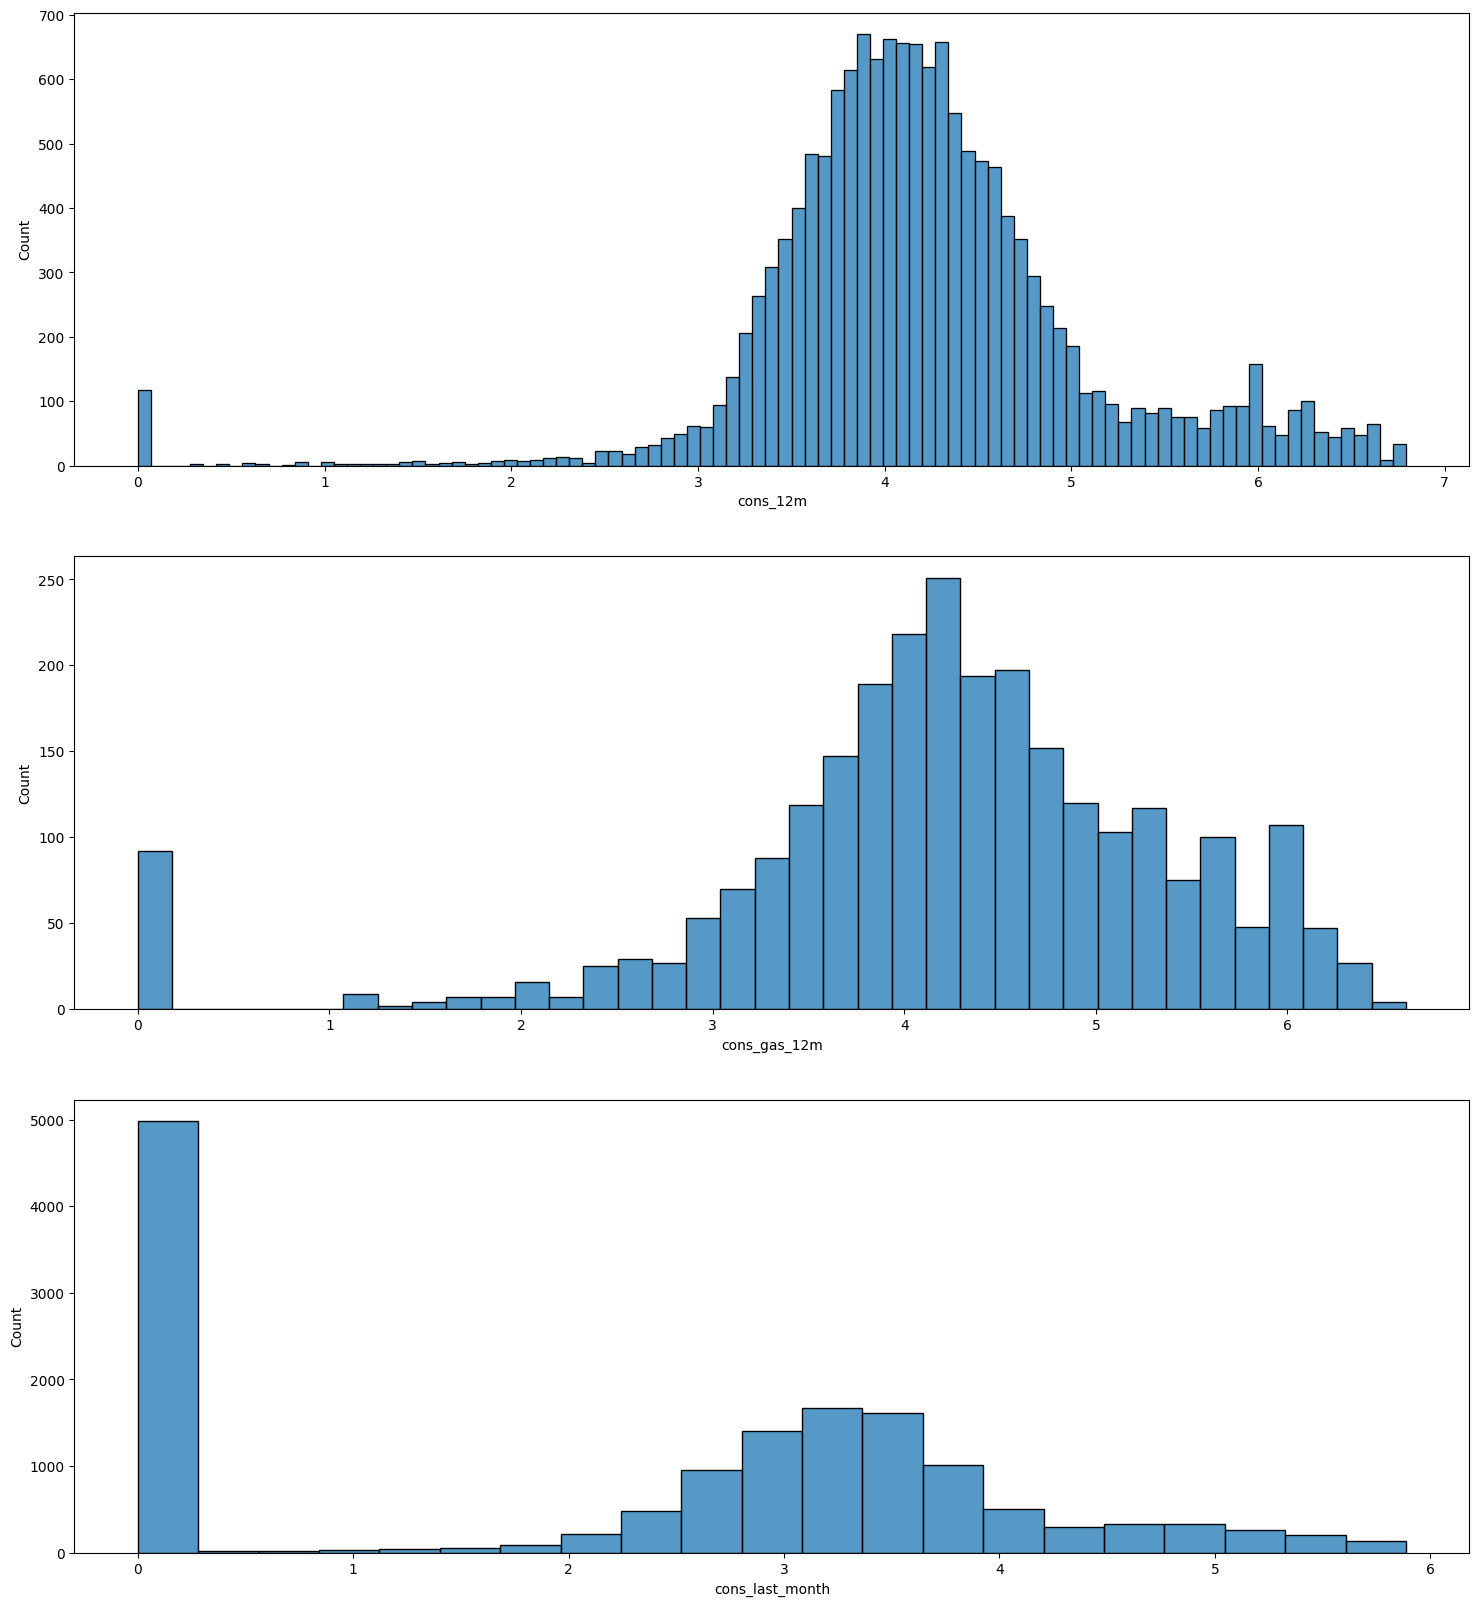

In [ ]:

fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
# Plot histograms
sns.histplot((df["cons_12m"].dropna()), ax=axs[0])
sns.histplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.histplot((df["cons_last_month"].dropna()), ax=axs[2])
plt.show()

## Check for Correlations

In [35]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 51 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          14606 non-null  object 
 1   cons_12m                                    14606 non-null  float64
 2   cons_gas_12m                                14606 non-null  float64
 3   cons_last_month                             14606 non-null  float64
 4   forecast_cons_12m                           14606 non-null  float64
 5   forecast_cons_year                          14606 non-null  float64
 6   forecast_discount_energy                    14606 non-null  float64
 7   forecast_meter_rent_12m                     14606 non-null  float64
 8   forecast_price_energy_off_peak              14606 non-null  float64
 9   forecast_price_energy_peak                  14606 non-null  float64
 10  forecast_p

In [38]:
df_corr = df.corr(numeric_only=True)

df_corr

cons_12m  cons_gas_12m  \
cons_12m                                    1.000000      0.209637   
cons_gas_12m                                0.209637      1.000000   
cons_last_month                             0.623493      0.171077   
forecast_cons_12m                           0.557186      0.108450   
forecast_cons_year                          0.321928      0.084575   
forecast_discount_energy                   -0.028437      0.001444   
forecast_meter_rent_12m                     0.201488      0.063462   
forecast_price_energy_off_peak             -0.144678     -0.041916   
forecast_price_energy_peak                  0.277831      0.075684   
forecast_price_pow_off_peak                -0.162694     -0.030439   
has_gas                                     0.154801      0.941198   
imp_cons                                    0.329977      0.092016   
margin_gross_pow_ele                       -0.044503     -0.013348   
margin_net_pow_ele                         -0.044475     -0.013362   
nb_prod_act                                 0.107272      0.688466   
net_margin                                  0.341290      0.104621   
num_years_antig                             0.006808      0.007658   
pow_max                                     0.172558      0.066254   
var_year_price_off_peak_var                -0.025206      0.007552   
var_year_price_peak_var                    -0.022745     -0.002425   
var_year_price_mid_peak_var                 0.067697      0.033884   
var_year_price_off_peak_fix                 0.010464      0.010441   
var_year_price_peak_fix                     0.065796      0.027326   
var_year_price_mid_peak_fix                 0.063723      0.030659   
var_year_price_off_peak                     0.010464      0.010441   
var_year_price_peak                         0.065795      0.027326   
var_year_price_mid_peak                     0.063723      0.030659   
var_6m_price_off_peak_var                   0.015851      0.013852   
var_6m_price_peak_var                      -0.010207      0.001664   
var_6m_price_mid_peak_var                   0.047482      0.041522   
var_6m_price_off_peak_fix                   0.023080      0.016023   
var_6m_price_peak_fix                       0.045578      0.040867   
var_6m_price_mid_peak_fix                   0.045956      0.040367   
var_6m_price_off_peak                       0.023080      0.016023   
var_6m_price_peak                           0.045578      0.040866   
var_6m_price_mid_peak                       0.045956      0.040367   
churn                                      -0.016693     -0.025134   
tenure                                     -0.026942      0.004945   
months_activ                               -0.003368      0.006183   
months_to_end                              -0.094377      0.009399   
months_modif_prod                           0.074105      0.019241   
months_renewal                              0.081059     -0.005422   
channel_MISSING                            -0.084505      0.030565   
channel_ewpakwlliwisiwduibdlfmalxowmwpci   -0.064549     -0.008177   
channel_foosdfpfkusacimwkcsosbicdxkicaua   -0.021040     -0.046458   
channel_lmkebamcaaclubfxadlmueccxoimlema    0.300029      0.048664   
channel_usilxuppasemubllopkaafesmlibmsdf   -0.125876     -0.014001   
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  0.032191      0.000443   
origin_up_ldkssxwpmemidmecebumciepifcamkci -0.026175      0.001582   
origin_up_lxidpiddsbxsbosboudacockeimpuepw -0.006561     -0.002899   

                                            cons_last_month  \
cons_12m                                           0.623493   
cons_gas_12m                                       0.171077   
cons_last_month                                    1.000000   
forecast_cons_12m                                  0.292725   
forecast_cons_year                                 0.786051   
forecast_discount_energy                          -0.015106   
forecast_meter_rent_12m         

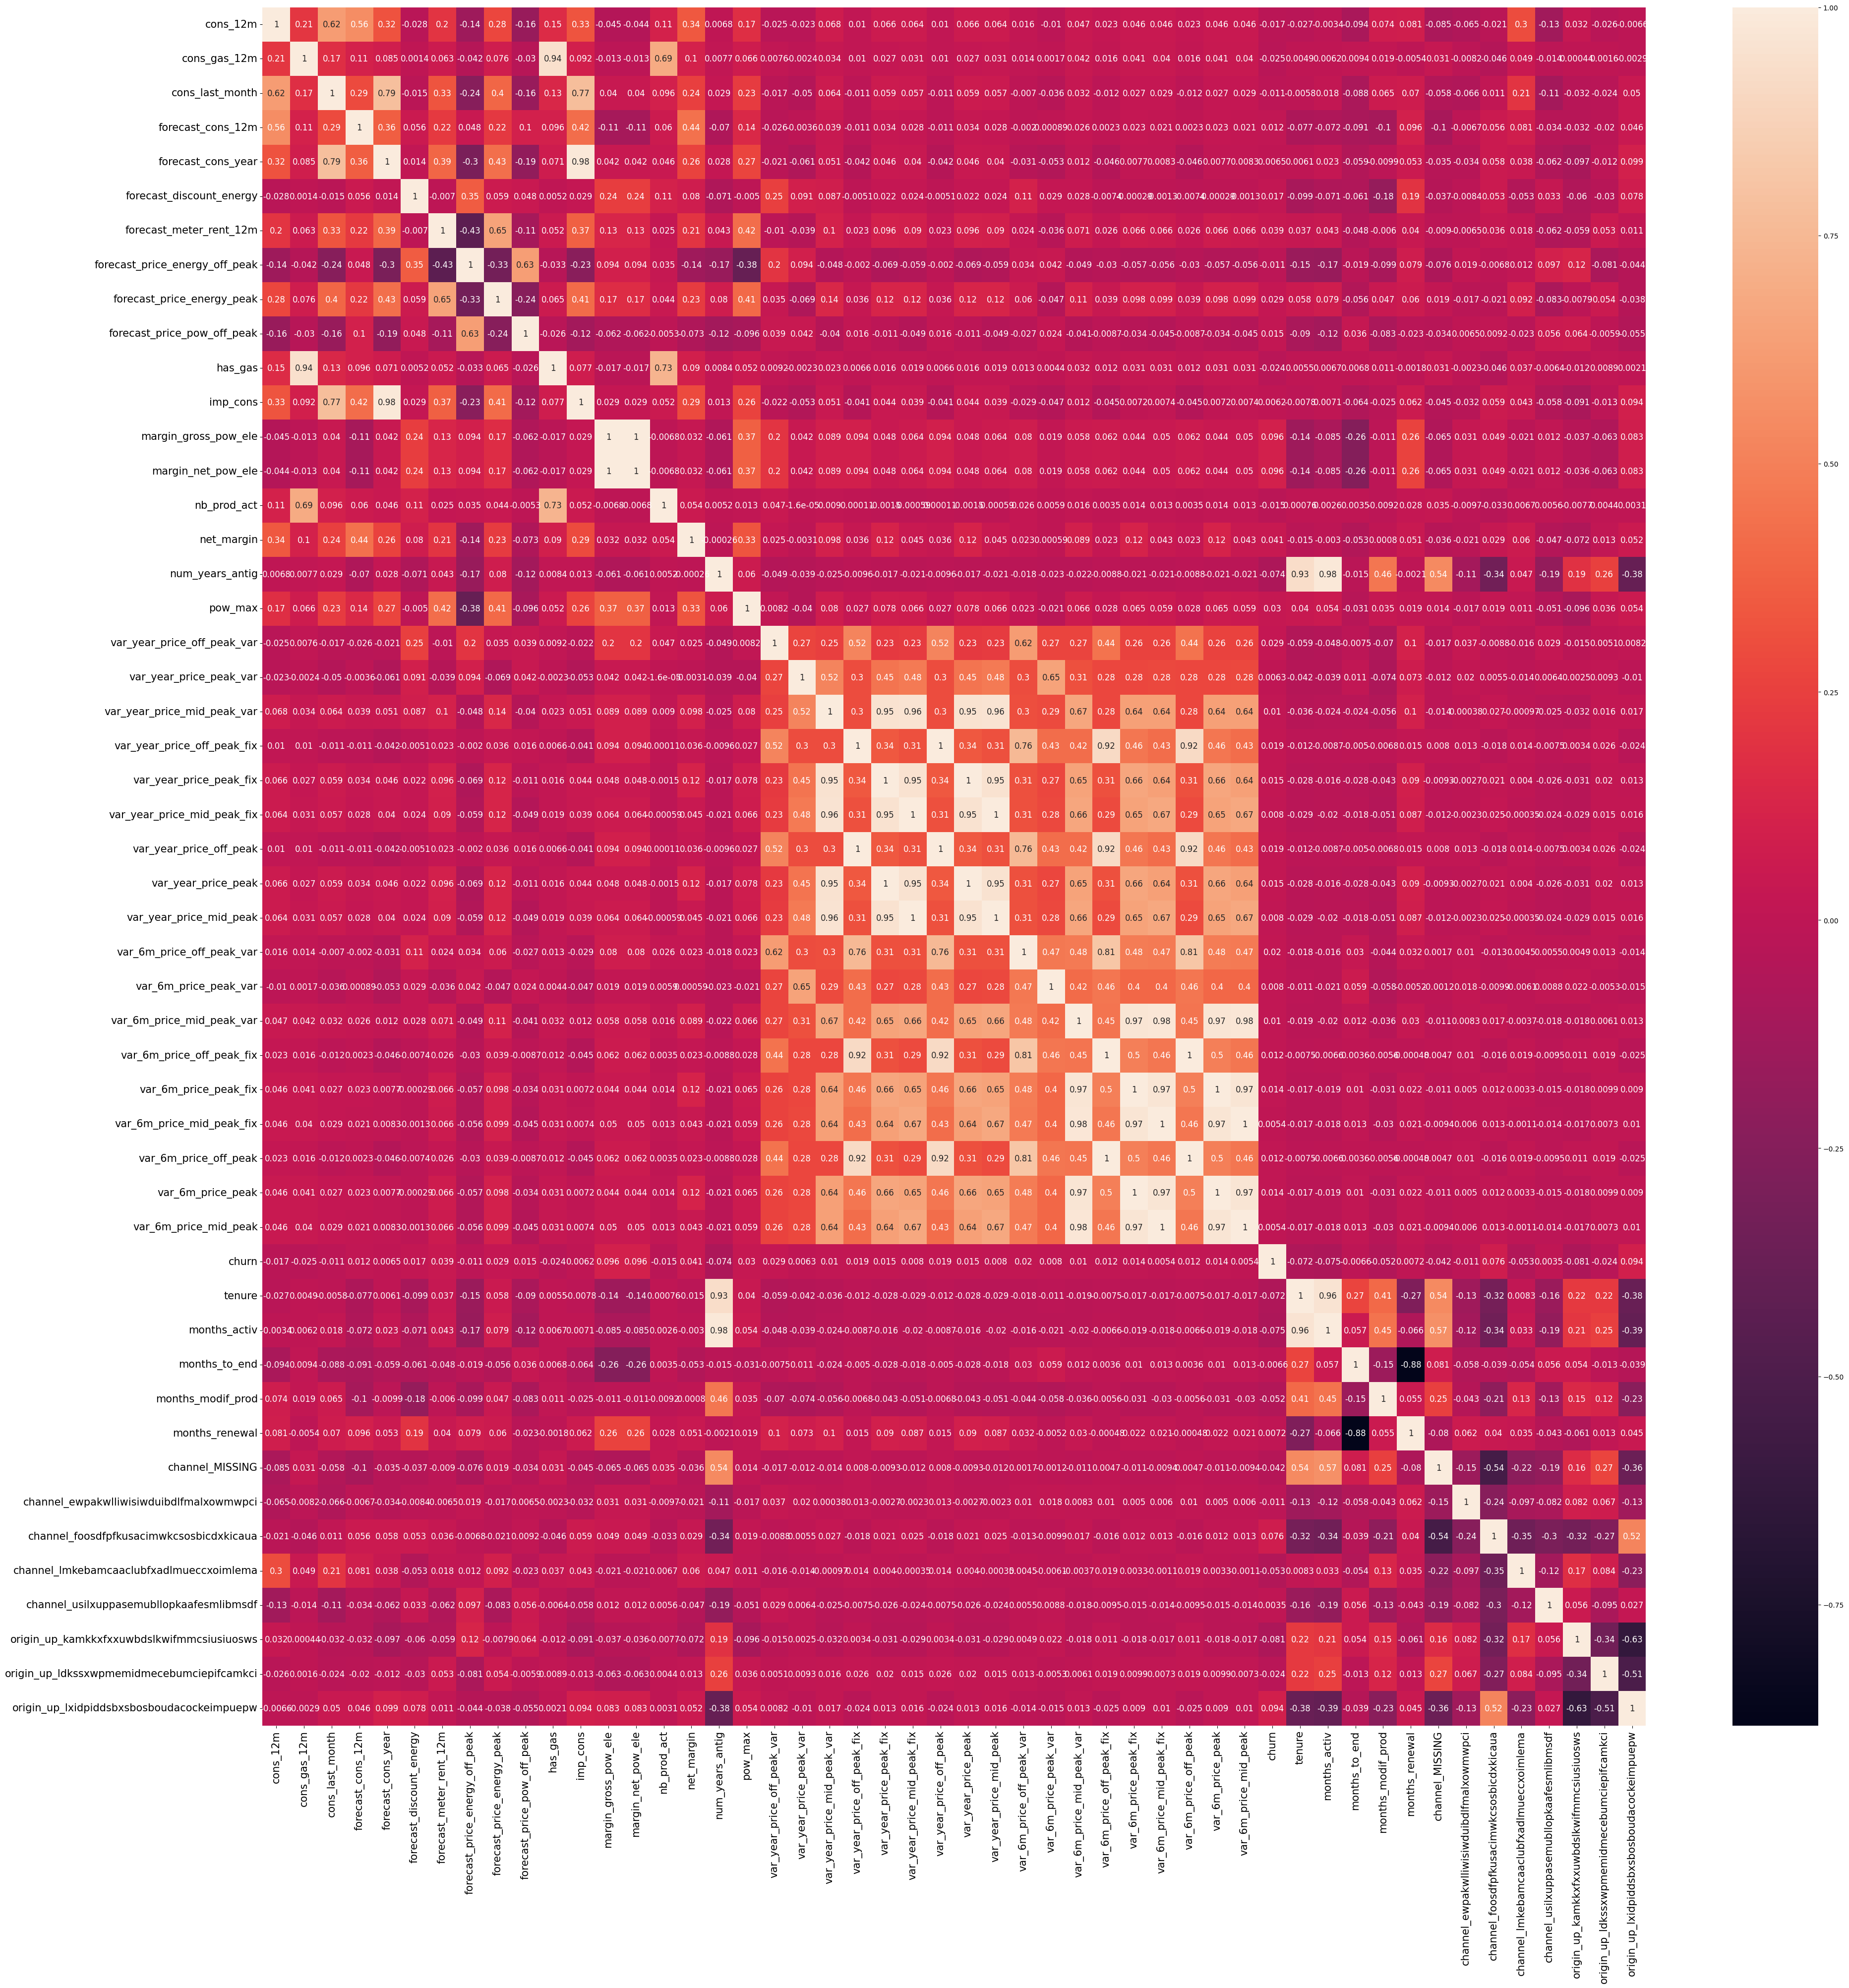

In [39]:
plt.figure(figsize=(45, 45))
sns.heatmap(
    df_corr, 
    xticklabels=df_corr.columns.values,
    yticklabels=df_corr.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [40]:
# Dropping cols with high correlation
df = df.drop(['num_years_antig', 'forecast_cons_year', 'months_activ','has_gas'], axis = 1)
df

id  cons_12m  cons_gas_12m  \
0      24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944   
1      d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000   
2      764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000   
3      bba03439a292a1e166f80264c16191cb  3.200029      0.000000   
4      149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000   
...                                 ...       ...           ...   
14601  18463073fb097fc0ac5d3e040f356987  4.508812      4.680707   
14602  d0a6f71671571ed83b2645d23af6de00  3.858778      0.000000   
14603  10e6828ddd62cbcf687cb74928c4c2d2  3.265996      0.000000   
14604  1cf20fd6206d7678d5bcafd28c53b4db  2.120574      0.000000   
14605  563dde550fd624d7352f3de77c0cdfcd  3.941064      0.000000   

       cons_last_month  forecast_cons_12m  forecast_discount_energy  \
0             0.000000           0.000000                       0.0   
1             0.000000           2.280920                       0.0   
2             0.000000           1.689841                       0.0   
3             0.000000           2.382089                       0.0   
4             2.721811           2.650065                       0.0   
...                ...                ...                       ...   
14601         0.000000           3.667360                       0.0   
14602         2.260071           2.801191                       0.0   
14603         2.255273           2.281919                       0.0   
14604         0.000000           1.308351                       0.0   
14605         0.000000           2.882758                       0.0   

       forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     0.444045                        0.114481   
1                     1.237292                        0.145711   
2                     1.599009                        0.165794   
3                     1.318689                        0.146694   
4                     2.122969                        0.116900   
...                        ...                             ...   
14601                 1.291591                        0.138305   
14602                 2.161458                        0.100167   
14603                 2.115943                        0.116900   
14604                 0.912753                        0.145711   
14605                 0.315970                        0.167086   

       forecast_price_energy_peak  forecast_price_pow_off_peak  ...  \
0                        0.098142                    40.606701  ...   
1                        0.000000                    44.311378  ...   
2                        0.087899                    44.311378  ...   
3                        0.000000                    44.311378  ...   
4                        0.100015                    40.606701  ...   
...                           ...                          ...  ...   
14601                    0.000000                    44.311378  ...   
14602                    0.091892                    58.995952  ...   
14603                    0.100015                    40.606701  ...   
14604                    0.000000                    44.311378  ...   
14605                    0.088454                    45.311378  ...   

       months_modif_prod  months_renewal  channel_MISSING  \
0                      2               6            False   
1                     76               4             True   
2                     68               8            False   
3                     69               9            False   
4                     71               9             True   
...                  ...             ...              ...   
14601                  7              19            False   
14602                 40               4            False   
14603                 46              10            False   
14604                 40               4            False   
14605                 72               0             True   



In [41]:

print(df.isnull().any().sum())

0


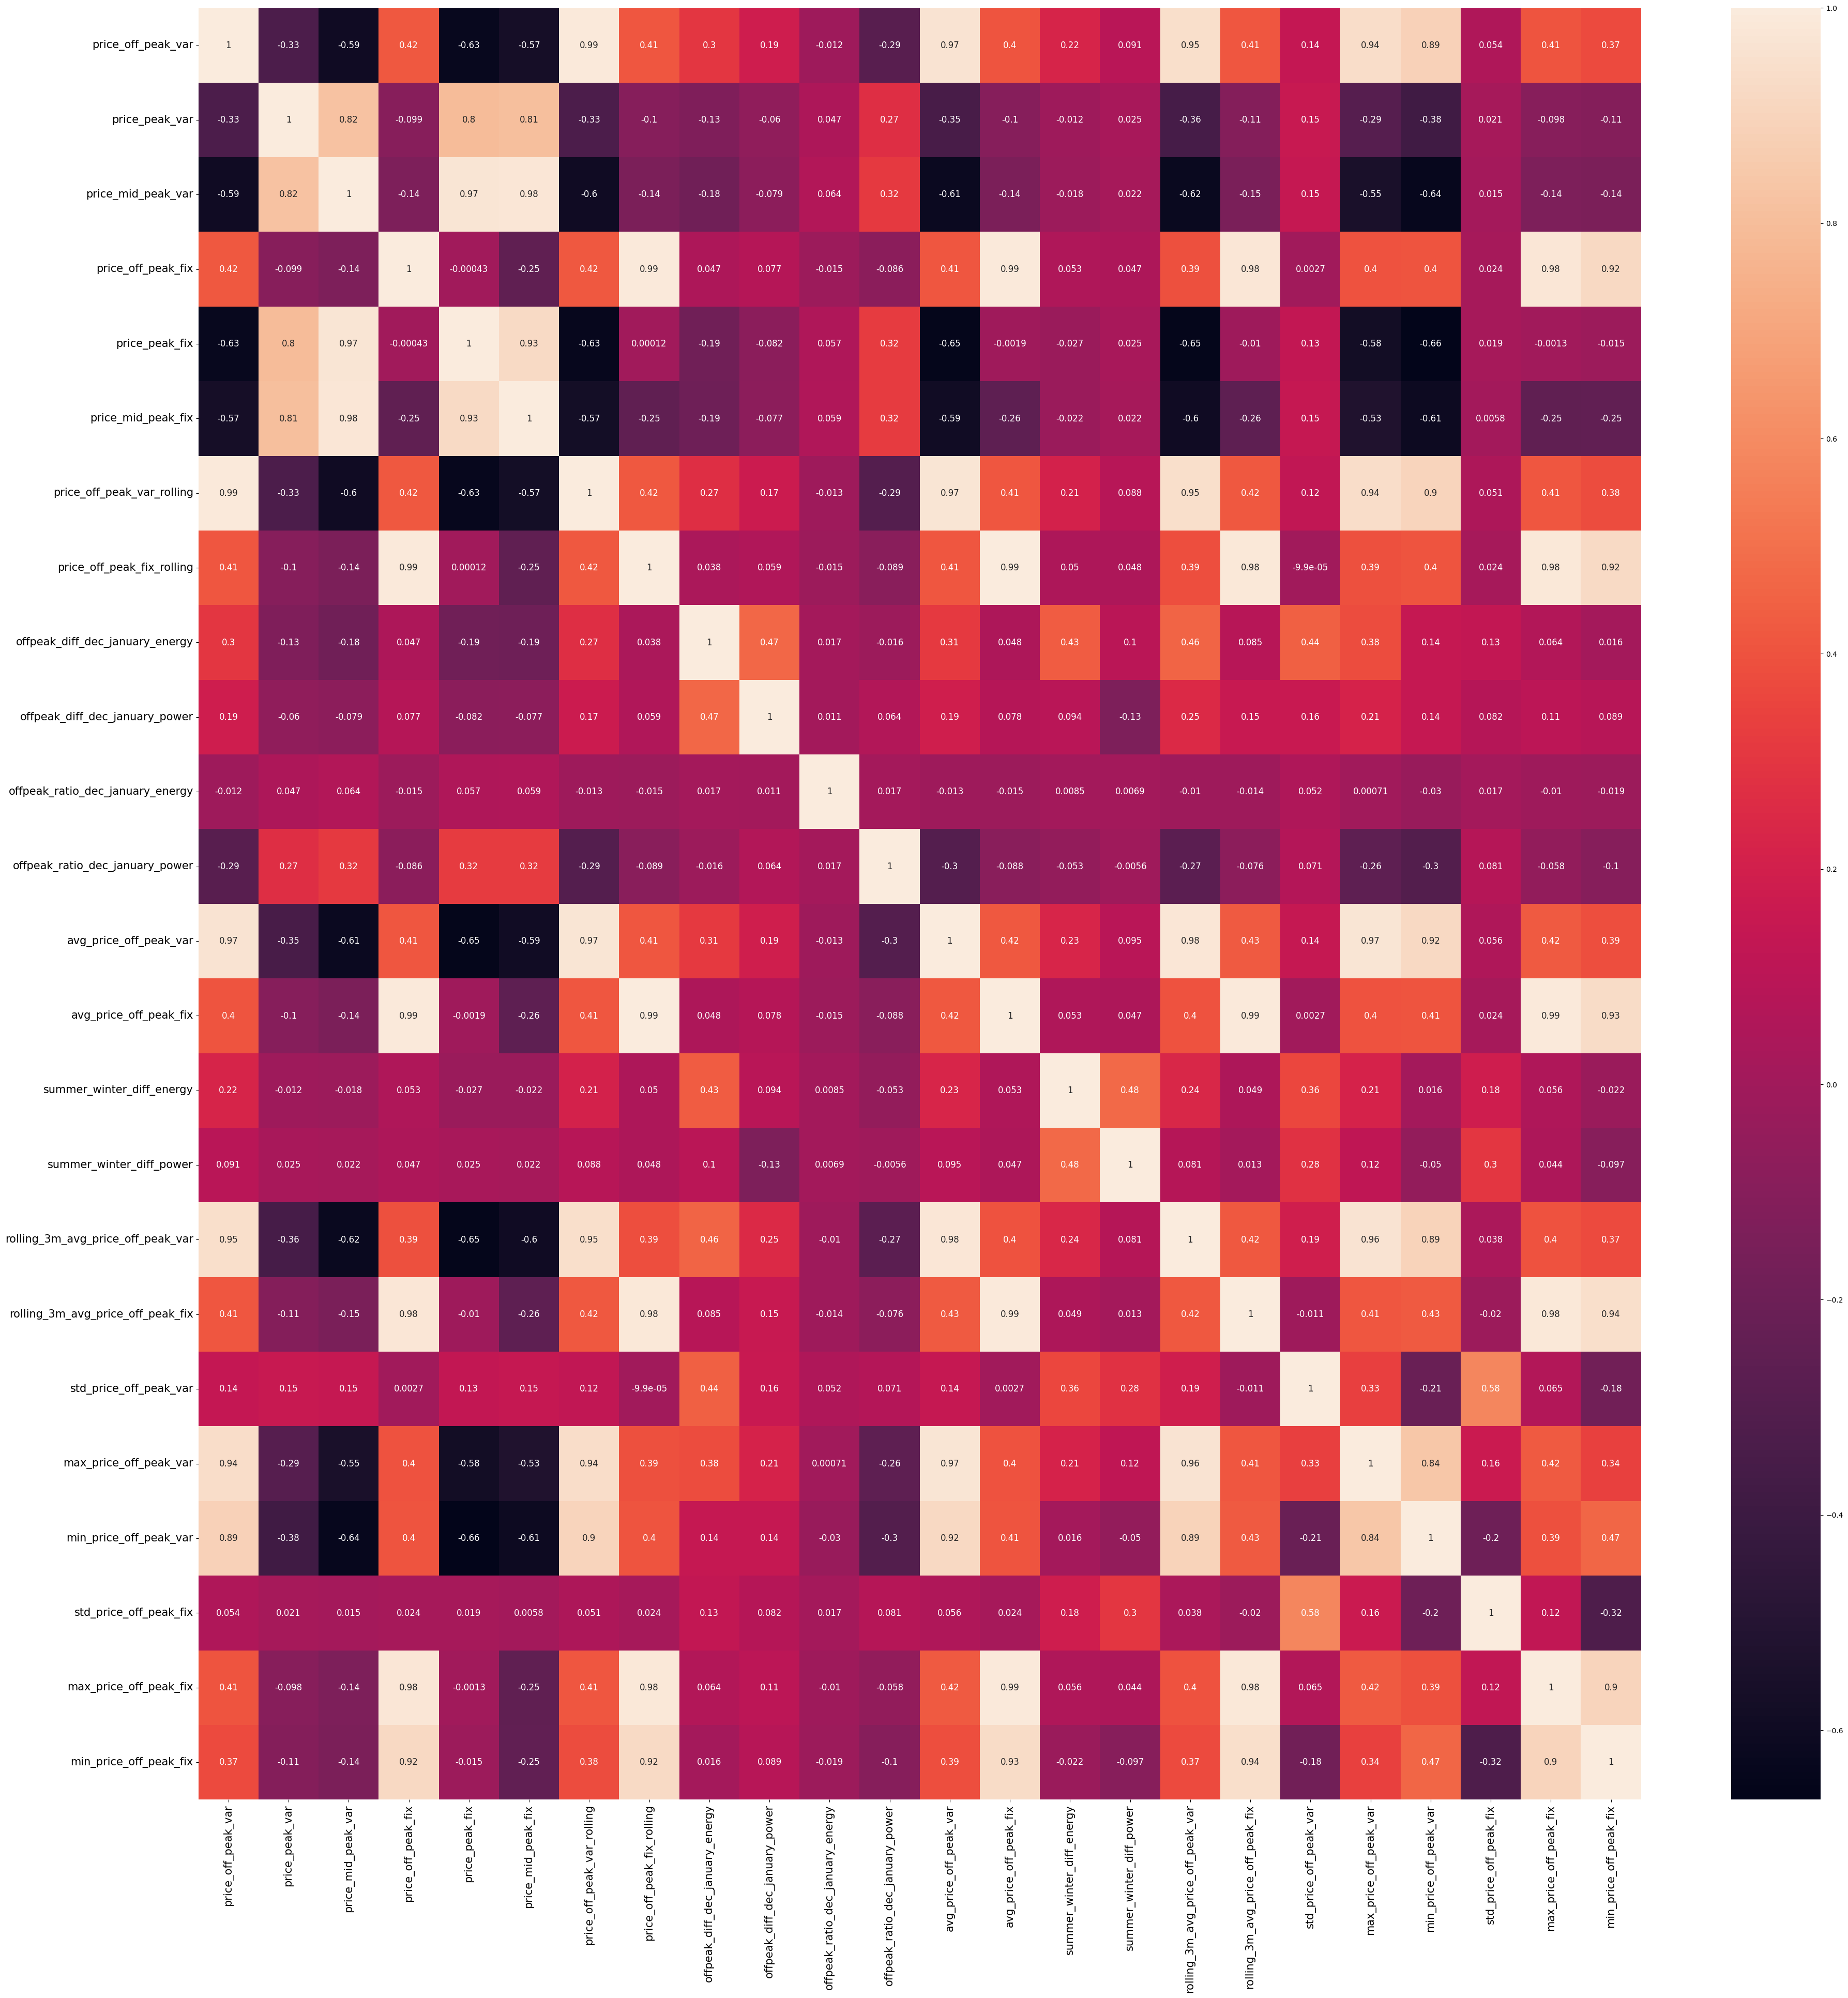

In [45]:
price_corr = price_df.corr(numeric_only=True)

plt.figure(figsize=(45, 45))
sns.heatmap(
    price_corr, 
    xticklabels=price_corr.columns.values,
    yticklabels=price_corr.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [46]:
price_df.columns

Index(['id', 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix',
       'price_off_peak_var_rolling', 'price_off_peak_fix_rolling',
       'offpeak_diff_dec_january_energy', 'offpeak_diff_dec_january_power',
       'offpeak_ratio_dec_january_energy', 'offpeak_ratio_dec_january_power',
       'avg_price_off_peak_var', 'avg_price_off_peak_fix',
       'summer_winter_diff_energy', 'summer_winter_diff_power',
       'rolling_3m_avg_price_off_peak_var',
       'rolling_3m_avg_price_off_peak_fix', 'std_price_off_peak_var',
       'max_price_off_peak_var', 'min_price_off_peak_var',
       'std_price_off_peak_fix', 'max_price_off_peak_fix',
       'min_price_off_peak_fix'],
      dtype='object')

In [47]:
# drop columns with high correlations

price_df = price_df.drop(
    ['rolling_3m_avg_price_off_peak_var', 'price_off_peak_var_rolling', 'avg_price_off_peak_var', 'min_price_off_peak_var', 'max_price_off_peak_var', \
     'price_off_peak_fix', 'price_off_peak_fix_rolling', 'avg_price_off_peak_fix', 'rolling_3m_avg_price_off_peak_fix', 'price_off_peak_var_rolling']
    , axis = 1)

price_df

id  price_off_peak_var  price_peak_var  \
0       038af19179925da21a25619c5a24b745            0.151367        0.000000   
1       038af19179925da21a25619c5a24b745            0.151367        0.000000   
2       038af19179925da21a25619c5a24b745            0.151367        0.000000   
3       038af19179925da21a25619c5a24b745            0.149626        0.000000   
4       038af19179925da21a25619c5a24b745            0.149626        0.000000   
...                                  ...                 ...             ...   
192997  16f51cdc2baa19af0b940ee1b3dd17d5            0.119916        0.102232   
192998  16f51cdc2baa19af0b940ee1b3dd17d5            0.119916        0.102232   
192999  16f51cdc2baa19af0b940ee1b3dd17d5            0.119916        0.102232   
193000  16f51cdc2baa19af0b940ee1b3dd17d5            0.119916        0.102232   
193001  16f51cdc2baa19af0b940ee1b3dd17d5            0.119916        0.102232   

        price_mid_peak_var  price_peak_fix  price_mid_peak_fix  \
0                 0.000000         0.00000            0.000000   
1                 0.000000         0.00000            0.000000   
2                 0.000000         0.00000            0.000000   
3                 0.000000         0.00000            0.000000   
4                 0.000000         0.00000            0.000000   
...                    ...             ...                 ...   
192997            0.076257        24.43733           16.291555   
192998            0.076257        24.43733           16.291555   
192999            0.076257        24.43733           16.291555   
193000            0.076257        24.43733           16.291555   
193001            0.076257        24.43733           16.291555   

        offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  \
0                             -0.005508                        0.177779   
1                             -0.005508                        0.177779   
2                             -0.005508                        0.177779   
3                             -0.005508                        0.177779   
4                             -0.005508                        0.177779   
...                                 ...                             ...   
192997                        -0.009528                        0.162916   
192998                        -0.009528                        0.162916   
192999                        -0.009528                        0.162916   
193000                        -0.009528                        0.162916   
193001                        -0.009528                        0.162916   

        offpeak_ratio_dec_january_energy  offpeak_ratio_dec_january_power  \
0                            -180.554103                         6.624968   
1                            -180.554103                         6.624968   
2                            -180.554103                         6.624968   
3                            -180.554103                         6.624968   
4                            -180.554103                         6.624968   
...                                  ...                              ...   
192997                       -103.953820                         7.138148   
192998                       -103.953820                         7.138148   
192999                       -103.953820                         7.138148   
193000                       -103.953820                         7.138148   
193001                       -103.953820                         7.138148   

        summer_winter_diff_energy  summer_winter_diff_power  \
0                       -0.000523                  0.088889   
1                       -0.000523                  0.088889   
2                       -0.000523                  0.088889   
3                       -0.000523                  0.088889   
4                       -0.000523                  0.088889   
...                           ...                       ...   
192997           

---
# _**Feature Engineering Pipeline**_

---

```python
import pandas as pd
import numpy as np

class FeatureEngineering:
    def __init__(self, price_df):
        """
        Initializes the FeatureEngineering class with the input price data.
        
        Parameters:
        price_df (pd.DataFrame): The DataFrame containing the price data.
        """
        self.price_df = price_df.copy(deep=True)
        self.features = pd.DataFrame()

    def calculate_monthly_price_differences(self):
        """
        Calculates the differences in energy prices between December and January.
        """
        monthly_price_by_id = self.price_df.groupby(['id', 'price_date']).agg({
            'price_off_peak_var': 'mean',
            'price_off_peak_fix': 'mean'
        }).reset_index()

        jan_prices = monthly_price_by_id.groupby('id').first()
        dec_prices = monthly_price_by_id.groupby('id').last()

        diff = dec_prices.drop('price_date', axis=1).join(
            jan_prices.drop('price_date', axis=1),
            on='id',
            how='inner',
            lsuffix='_d',
            rsuffix='_j'
        )
        diff['offpeak_diff_dec_january_energy'] = diff['price_off_peak_var_d'] - diff['price_off_peak_var_j']
        diff['offpeak_diff_dec_january_power'] = diff['price_off_peak_fix_d'] - diff['price_off_peak_fix_j']

        self.features = pd.concat([self.features, diff[['offpeak_diff_dec_january_energy', 'offpeak_diff_dec_january_power']]], axis=1)

    def calculate_price_ratios(self):
        """
        Calculates price ratios for the differences between December and January.
        """
        self.features['offpeak_ratio_dec_january_energy'] = (self.features['offpeak_diff_dec_january_energy'] + 1) / self.features['offpeak_diff_dec_january_energy']
        self.features['offpeak_ratio_dec_january_power'] = (self.features['offpeak_diff_dec_january_power'] + 1) / self.features['offpeak_diff_dec_january_power']

    def calculate_annual_averages(self):
        """
        Calculates the annual average prices for energy and power.
        """
        annual_avg = self.price_df.groupby('id').agg({
            'price_off_peak_var': 'mean',
            'price_off_peak_fix': 'mean'
        })
        annual_avg.rename(columns={
            'price_off_peak_var': 'avg_price_off_peak_var',
            'price_off_peak_fix': 'avg_price_off_peak_fix'
        }, inplace=True)
        
        self.features = self.features.join(annual_avg, on='id', how='left')

    def calculate_seasonal_averages(self):
        """
        Calculates the average prices for summer and winter.
        """
        summer_prices = self.price_df[(self.price_df['price_date'].dt.month == 7) | (self.price_df['price_date'].dt.month == 8)]
        winter_prices = self.price_df[(self.price_df['price_date'].dt.month == 12) | (self.price_df['price_date'].dt.month == 1)]

        summer_avg = summer_prices.groupby('id').agg({
            'price_off_peak_var': 'mean',
            'price_off_peak_fix': 'mean'
        })

        winter_avg = winter_prices.groupby('id').agg({
            'price_off_peak_var': 'mean',
            'price_off_peak_fix': 'mean'
        })

        summer_avg.rename({
            'price_off_peak_var': 'price_off_peak_var_summer',
            'price_off_peak_fix': 'price_off_peak_fix_summer'
        }, axis=1, inplace=True)

        winter_avg.rename({
            'price_off_peak_var': 'price_off_peak_var_winter',
            'price_off_peak_fix': 'price_off_peak_fix_winter'
        }, axis=1, inplace=True)

        seasonal_diff = summer_avg.join(winter_avg, on='id', how='right', lsuffix='_summer', rsuffix='_winter')
        seasonal_diff['summer_winter_diff_energy'] = seasonal_diff['price_off_peak_var_summer'] - seasonal_diff['price_off_peak_var_winter']
        seasonal_diff['summer_winter_diff_power'] = seasonal_diff['price_off_peak_fix_summer'] - seasonal_diff['price_off_peak_fix_winter']

        self.features = self.features.join(seasonal_diff[['summer_winter_diff_energy', 'summer_winter_diff_power']], on='id', how='left')

    def calculate_rolling_averages(self):
        """
        Calculates rolling 3-month averages for energy and power prices.
        """
        self.price_df['price_off_peak_var_rolling'] = self.price_df.groupby('id')['price_off_peak_var'].rolling(window=3, min_periods=1).mean().reset_index(0, drop=True)
        self.price_df['price_off_peak_fix_rolling'] = self.price_df.groupby('id')['price_off_peak_fix'].rolling(window=3, min_periods=1).mean().reset_index(0, drop=True)

        rolling_avg = self.price_df.groupby('id').agg({
            'price_off_peak_var_rolling': 'last',
            'price_off_peak_fix_rolling': 'last'
        })
        rolling_avg.rename(columns={
            'price_off_peak_var_rolling': 'rolling_3m_avg_price_off_peak_var',
            'price_off_peak_fix_rolling': 'rolling_3m_avg_price_off_peak_fix'
        }, inplace=True)

        self.features = self.features.join(rolling_avg, on='id', how='left')

    def calculate_price_variability(self):
        """
        Calculates the standard deviation, max, and min for energy and power prices.
        """
        price_variability = self.price_df.groupby('id').agg({
            'price_off_peak_var': ['std', 'max', 'min'],
            'price_off_peak_fix': ['std', 'max', 'min']
        })
        price_variability.columns = [
            'std_price_off_peak_var', 'max_price_off_peak_var', 'min_price_off_peak_var',
            'std_price_off_peak_fix', 'max_price_off_peak_fix', 'min_price_off_peak_fix'
        ]
        
        self.features = self.features.join(price_variability, on='id', how='left')

    
    def run_feature_engineering(self):
        """
        Runs the entire feature engineering process by calling all the methods.
        """
        self.calculate_monthly_price_differences()
        self.calculate_price_ratios()
        self.calculate_annual_averages()
        self.calculate_seasonal_averages()
        self.calculate_rolling_averages()
        self.calculate_price_variability()
        # Merge final features back with the original price DataFrame
        self.price_df = self.price_df.drop('price_date', axis = 1).join(self.features, on='id', how='left')
        return self.price_df
    
# Usage example:
# price_df = pd.read_csv('path/to/price_data.csv')  # Ensure price_df is already loaded
# pipeline = FeatureEngineeringPipeline(price_df)
# enriched_price_df = pipeline.run_feature_engineering()
```

The entire process can be summarized into this:

In [2]:
# Assuming price_df is already defined
df_e = pd.read_csv('e:/BCGX/data/clean_data_after_eda.csv')
price_df_e = pd.read_csv(r'E:\BCGX Data\Data\price_data.csv')

df_e = clean_data(df_e)
price_df_e = clean_data(price_df_e)


pipeline = FeatureEngineering(price_df_e)
enriched_price_df = pipeline.run_feature_engineering()
df_e, enriched_price_df = pipeline.wrangle_final(df_e, enriched_price_df)

# final_features now contains all the engineered features


In [10]:
display(df_e), display(enriched_price_df)

id  cons_12m  cons_gas_12m  \
0      24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944   
1      d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000   
2      764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000   
3      bba03439a292a1e166f80264c16191cb  3.200029      0.000000   
4      149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000   
...                                 ...       ...           ...   
14601  18463073fb097fc0ac5d3e040f356987  4.508812      4.680707   
14602  d0a6f71671571ed83b2645d23af6de00  3.858778      0.000000   
14603  10e6828ddd62cbcf687cb74928c4c2d2  3.265996      0.000000   
14604  1cf20fd6206d7678d5bcafd28c53b4db  2.120574      0.000000   
14605  563dde550fd624d7352f3de77c0cdfcd  3.941064      0.000000   

       cons_last_month  forecast_cons_12m  forecast_discount_energy  \
0             0.000000           0.000000                       0.0   
1             0.000000           2.280920                       0.0   
2             0.000000           1.689841                       0.0   
3             0.000000           2.382089                       0.0   
4             2.721811           2.650065                       0.0   
...                ...                ...                       ...   
14601         0.000000           3.667360                       0.0   
14602         2.260071           2.801191                       0.0   
14603         2.255273           2.281919                       0.0   
14604         0.000000           1.308351                       0.0   
14605         0.000000           2.882758                       0.0   

       forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     0.444045                        0.114481   
1                     1.237292                        0.145711   
2                     1.599009                        0.165794   
3                     1.318689                        0.146694   
4                     2.122969                        0.116900   
...                        ...                             ...   
14601                 1.291591                        0.138305   
14602                 2.161458                        0.100167   
14603                 2.115943                        0.116900   
14604                 0.912753                        0.145711   
14605                 0.315970                        0.167086   

       forecast_price_energy_peak  forecast_price_pow_off_peak  ...  \
0                        0.098142                    40.606701  ...   
1                        0.000000                    44.311378  ...   
2                        0.087899                    44.311378  ...   
3                        0.000000                    44.311378  ...   
4                        0.100015                    40.606701  ...   
...                           ...                          ...  ...   
14601                    0.000000                    44.311378  ...   
14602                    0.091892                    58.995952  ...   
14603                    0.100015                    40.606701  ...   
14604                    0.000000                    44.311378  ...   
14605                    0.088454                    45.311378  ...   

       months_modif_prod  months_renewal  channel_MISSING  \
0                      2               6            False   
1                     76               4             True   
2                     68               8            False   
3                     69               9            False   
4                     71               9             True   
...                  ...             ...              ...   
14601                  7              19            False   
14602                 40               4            False   
14603                 46              10            False   
14604                 40               4            False   
14605                 72               0             True   



id  price_off_peak_var  price_peak_var  \
0       038af19179925da21a25619c5a24b745            0.151367        0.000000   
1       038af19179925da21a25619c5a24b745            0.151367        0.000000   
2       038af19179925da21a25619c5a24b745            0.151367        0.000000   
3       038af19179925da21a25619c5a24b745            0.149626        0.000000   
4       038af19179925da21a25619c5a24b745            0.149626        0.000000   
...                                  ...                 ...             ...   
192997  16f51cdc2baa19af0b940ee1b3dd17d5            0.119916        0.102232   
192998  16f51cdc2baa19af0b940ee1b3dd17d5            0.119916        0.102232   
192999  16f51cdc2baa19af0b940ee1b3dd17d5            0.119916        0.102232   
193000  16f51cdc2baa19af0b940ee1b3dd17d5            0.119916        0.102232   
193001  16f51cdc2baa19af0b940ee1b3dd17d5            0.119916        0.102232   

        price_mid_peak_var  price_peak_fix  price_mid_peak_fix  \
0                 0.000000         0.00000            0.000000   
1                 0.000000         0.00000            0.000000   
2                 0.000000         0.00000            0.000000   
3                 0.000000         0.00000            0.000000   
4                 0.000000         0.00000            0.000000   
...                    ...             ...                 ...   
192997            0.076257        24.43733           16.291555   
192998            0.076257        24.43733           16.291555   
192999            0.076257        24.43733           16.291555   
193000            0.076257        24.43733           16.291555   
193001            0.076257        24.43733           16.291555   

        offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  \
0                             -0.005508                        0.177779   
1                             -0.005508                        0.177779   
2                             -0.005508                        0.177779   
3                             -0.005508                        0.177779   
4                             -0.005508                        0.177779   
...                                 ...                             ...   
192997                        -0.009528                        0.162916   
192998                        -0.009528                        0.162916   
192999                        -0.009528                        0.162916   
193000                        -0.009528                        0.162916   
193001                        -0.009528                        0.162916   

        offpeak_ratio_dec_january_energy  offpeak_ratio_dec_january_power  \
0                            -180.554103                         6.624968   
1                            -180.554103                         6.624968   
2                            -180.554103                         6.624968   
3                            -180.554103                         6.624968   
4                            -180.554103                         6.624968   
...                                  ...                              ...   
192997                       -103.953820                         7.138148   
192998                       -103.953820                         7.138148   
192999                       -103.953820                         7.138148   
193000                       -103.953820                         7.138148   
193001                       -103.953820                         7.138148   

        summer_winter_diff_energy  summer_winter_diff_power  \
0                       -0.000523                  0.088889   
1                       -0.000523                  0.088889   
2                       -0.000523                  0.088889   
3                       -0.000523                  0.088889   
4                       -0.000523                  0.088889   
...                           ...                       ...   
192997           

(None, None)

In [9]:
df_enriched = enriched_price_df.merge(df_e, on = 'id', how = 'inner')
df_enriched

id  price_off_peak_var  price_peak_var  \
0       038af19179925da21a25619c5a24b745            0.151367        0.000000   
1       038af19179925da21a25619c5a24b745            0.151367        0.000000   
2       038af19179925da21a25619c5a24b745            0.151367        0.000000   
3       038af19179925da21a25619c5a24b745            0.149626        0.000000   
4       038af19179925da21a25619c5a24b745            0.149626        0.000000   
...                                  ...                 ...             ...   
175144  16f51cdc2baa19af0b940ee1b3dd17d5            0.119916        0.102232   
175145  16f51cdc2baa19af0b940ee1b3dd17d5            0.119916        0.102232   
175146  16f51cdc2baa19af0b940ee1b3dd17d5            0.119916        0.102232   
175147  16f51cdc2baa19af0b940ee1b3dd17d5            0.119916        0.102232   
175148  16f51cdc2baa19af0b940ee1b3dd17d5            0.119916        0.102232   

        price_mid_peak_var  price_peak_fix  price_mid_peak_fix  \
0                 0.000000         0.00000            0.000000   
1                 0.000000         0.00000            0.000000   
2                 0.000000         0.00000            0.000000   
3                 0.000000         0.00000            0.000000   
4                 0.000000         0.00000            0.000000   
...                    ...             ...                 ...   
175144            0.076257        24.43733           16.291555   
175145            0.076257        24.43733           16.291555   
175146            0.076257        24.43733           16.291555   
175147            0.076257        24.43733           16.291555   
175148            0.076257        24.43733           16.291555   

        offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  \
0                             -0.005508                        0.177779   
1                             -0.005508                        0.177779   
2                             -0.005508                        0.177779   
3                             -0.005508                        0.177779   
4                             -0.005508                        0.177779   
...                                 ...                             ...   
175144                        -0.009528                        0.162916   
175145                        -0.009528                        0.162916   
175146                        -0.009528                        0.162916   
175147                        -0.009528                        0.162916   
175148                        -0.009528                        0.162916   

        offpeak_ratio_dec_january_energy  offpeak_ratio_dec_january_power  \
0                            -180.554103                         6.624968   
1                            -180.554103                         6.624968   
2                            -180.554103                         6.624968   
3                            -180.554103                         6.624968   
4                            -180.554103                         6.624968   
...                                  ...                              ...   
175144                       -103.953820                         7.138148   
175145                       -103.953820                         7.138148   
175146                       -103.953820                         7.138148   
175147                       -103.953820                         7.138148   
175148                       -103.953820                         7.138148   

        ...  months_modif_prod  months_renewal  channel_MISSING  \
0       ...                  8               6            False   
1       ...                  8               6            False   
2       ...                  8               6            False   
3       ...                  8               6            False   
4       ...                  8               6            False   
...     ...                ...             ...          

In [11]:
df_enriched.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175149 entries, 0 to 175148
Data columns (total 62 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   id                                          175149 non-null  object 
 1   price_off_peak_var                          175149 non-null  float64
 2   price_peak_var                              175149 non-null  float64
 3   price_mid_peak_var                          175149 non-null  float64
 4   price_peak_fix                              175149 non-null  float64
 5   price_mid_peak_fix                          175149 non-null  float64
 6   offpeak_diff_dec_january_energy             175149 non-null  float64
 7   offpeak_diff_dec_january_power              175149 non-null  float64
 8   offpeak_ratio_dec_january_energy            175149 non-null  float64
 9   offpeak_ratio_dec_january_power             175149 non-null  float64
 

In [12]:
df_enriched.to_csv('e:/BCGX/data/final_merged_features.csv', index=False)

KeyboardInterrupt: 